In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew, normaltest, boxcox
from scipy import stats

# Data Exploration

In [2]:
data = pd.read_csv("../datasets/Life Expectancy Data.csv")

In [3]:
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [4]:
data.shape

(2938, 22)

In [5]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
# rename columns
data = data.rename(columns={
    "Country": "country", 
    "Year": "year", 
    "Status": "status", 
    "Life expectancy ": "life_expectancy", 
    "Adult Mortality": "adult_mortality",
    "infant deaths": "infant_deaths", 
    "Alcohol": "alcohol", 
    "percentage expenditure": "expenditure_percent", 
    "Hepatitis B": "hepatitis_b",
    "Measles ": "measles", 
    " BMI ": "bmi", 
    "under-five deaths ": "under_five", 
    "Polio": "polio", 
    "Total expenditure": "expenditure_total",
    "Diphtheria ": "diphtheria", 
    " HIV/AIDS": "aids", 
    "GDP": "gdp", 
    "Population": "population",
    " thinness  1-19 years": "thinness_a", 
    " thinness 5-9 years": "thinness_b",
    "Income composition of resources": "resources", 
    "Schooling": "schooling",
})

In [7]:
# check for duplicates
data.duplicated(keep=False).value_counts()

False    2938
dtype: int64

<AxesSubplot:>

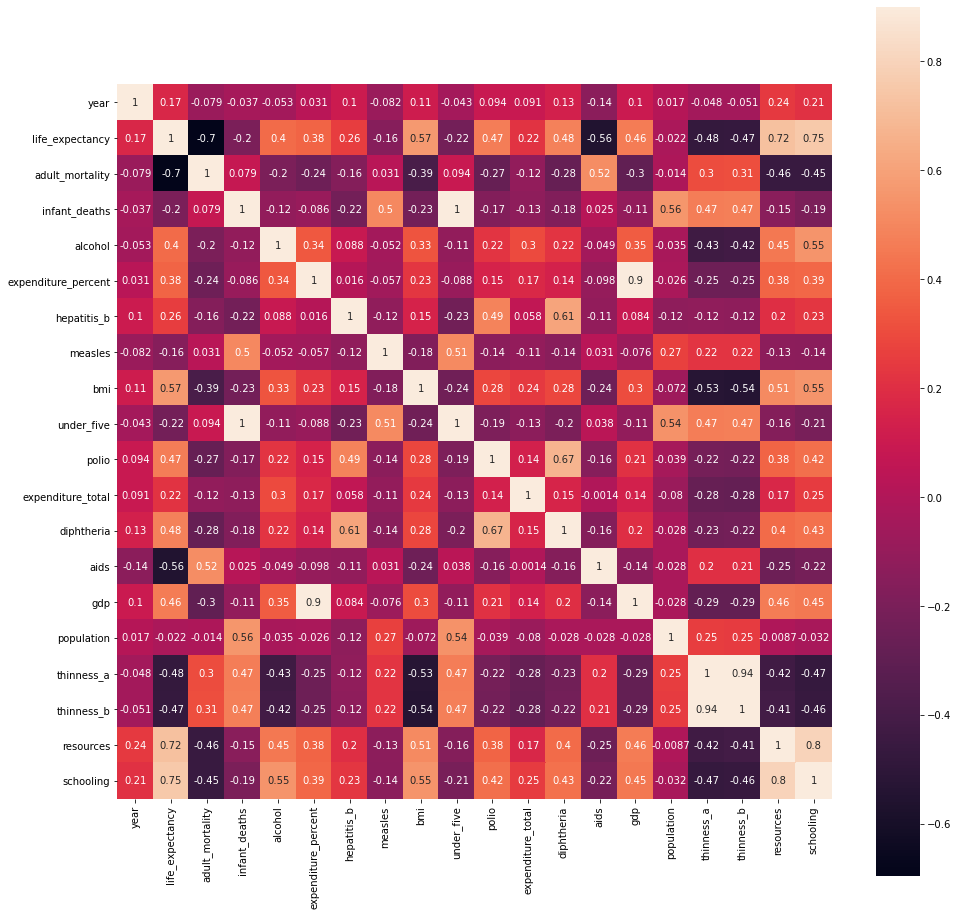

In [8]:
# view correlation matrix heatmap of all variables
plt.subplots(figsize=(16,16))
sns.heatmap(data.corr(), vmax=0.9, square=True, annot=True)

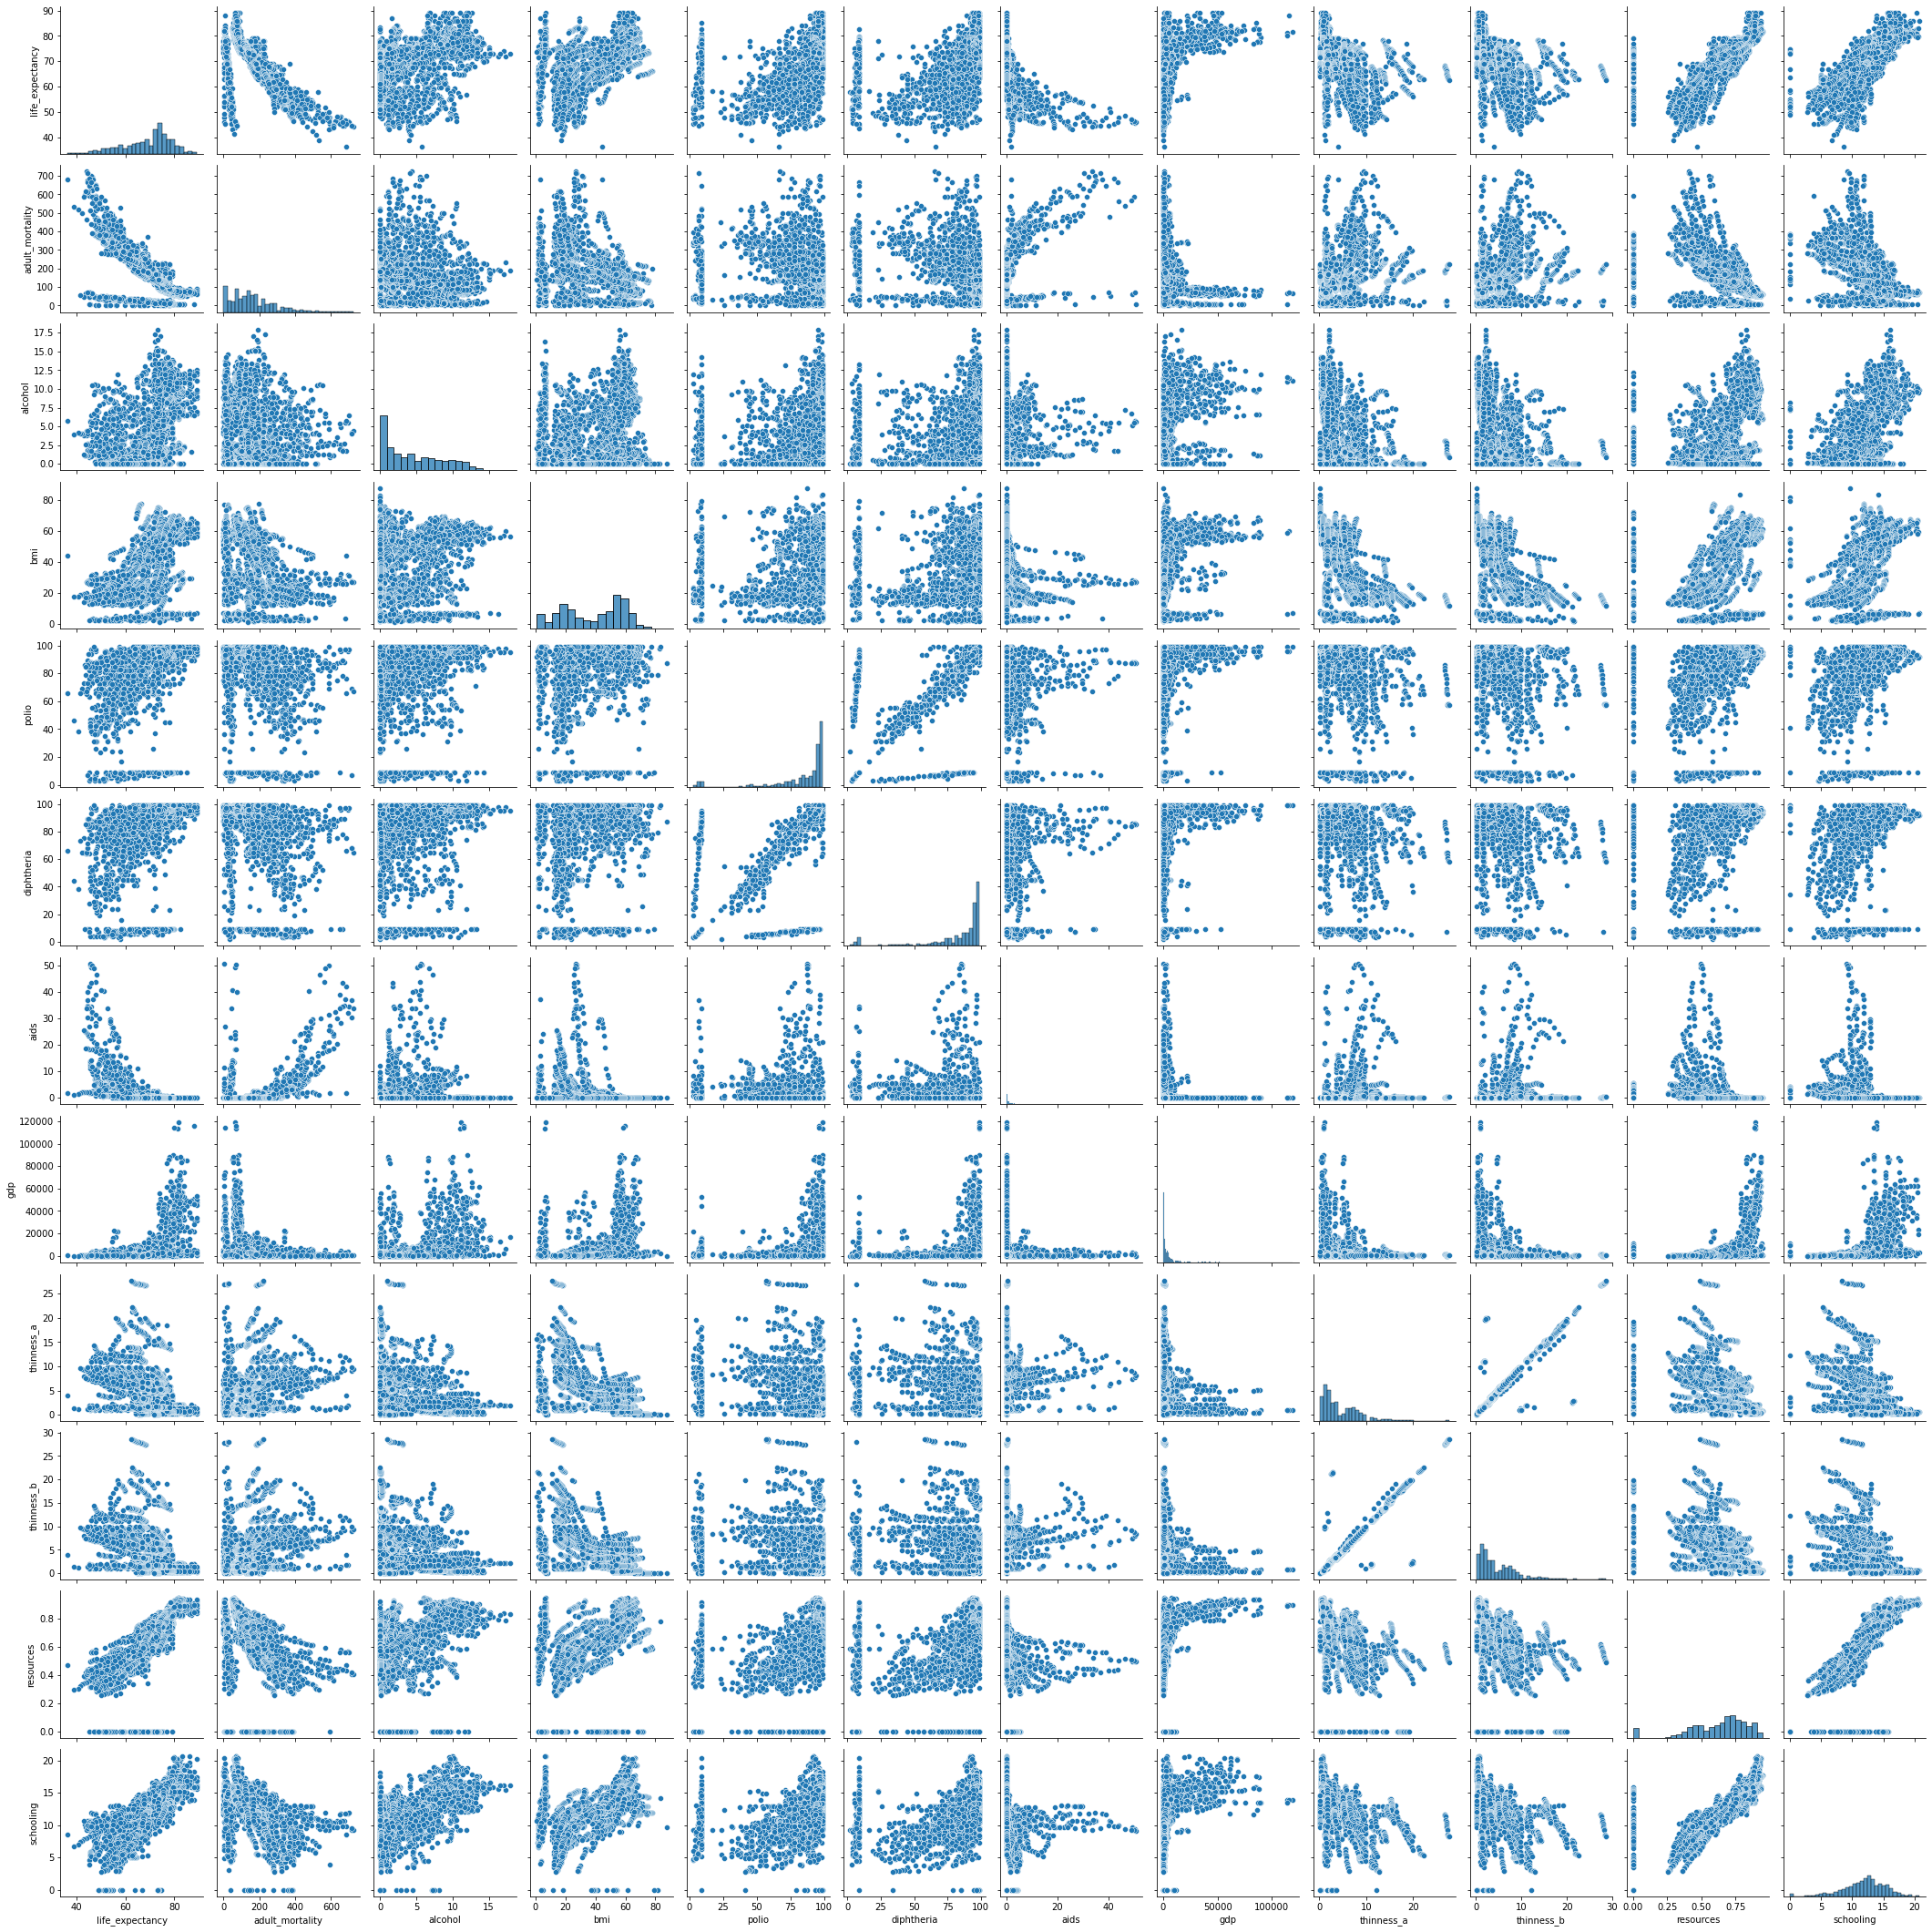

In [9]:
# view correlation pairplot of important variables
sns.pairplot(data, vars = ["life_expectancy", "adult_mortality", "alcohol", "bmi", "polio", "diphtheria", "aids", "gdp", "thinness_a", "thinness_b", "resources", "schooling"])

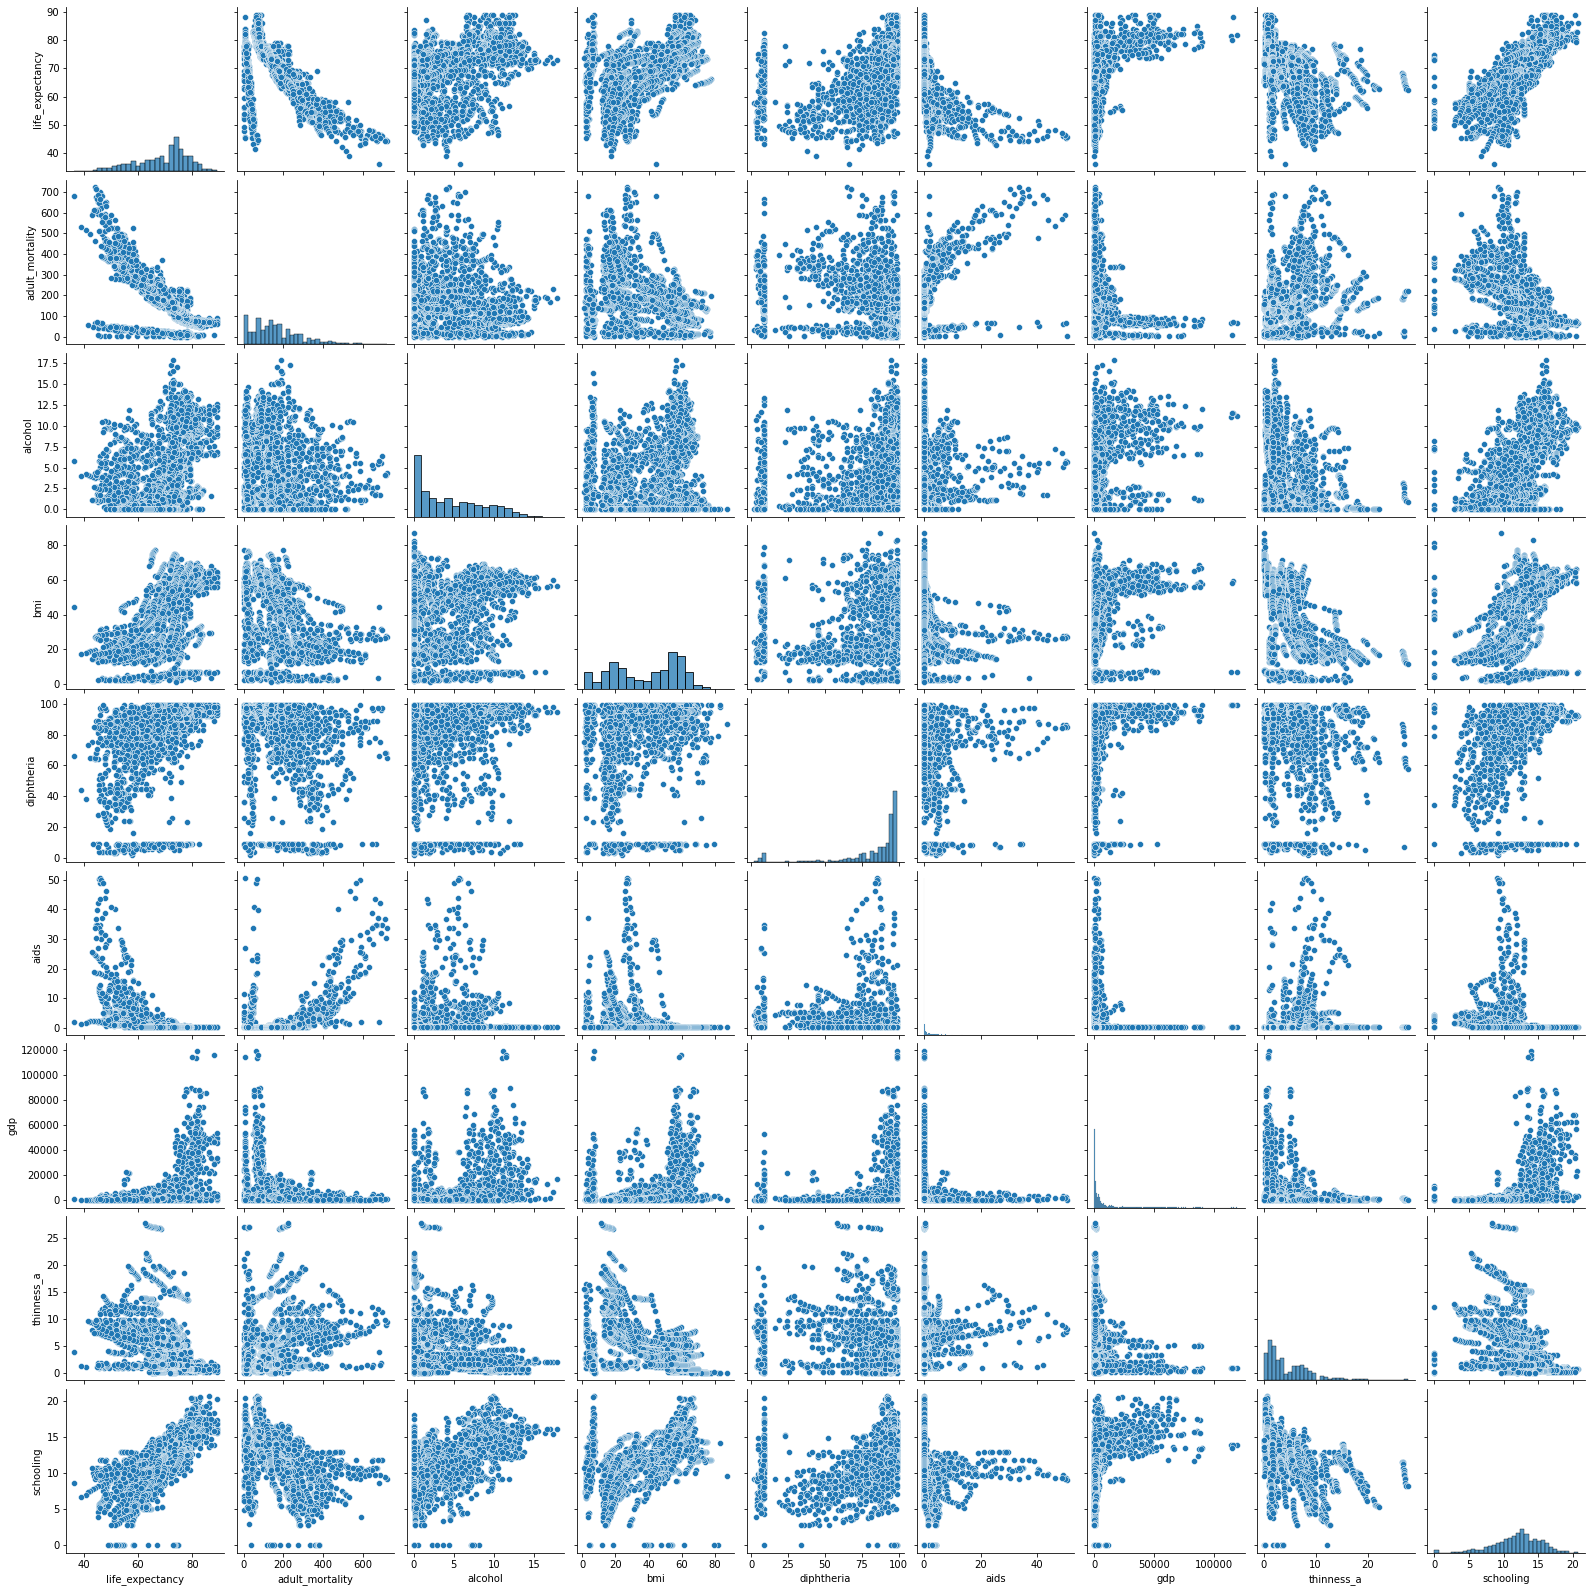

In [10]:
# view correlation pairplot of important variables, removing some multicollinear ones
sns.pairplot(data, vars = ["life_expectancy", "adult_mortality", "alcohol", "bmi", "diphtheria", "aids", "gdp", "thinness_a", "schooling"])

/home/daniel/miniconda3/envs/kaggle/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='life_expectancy'>

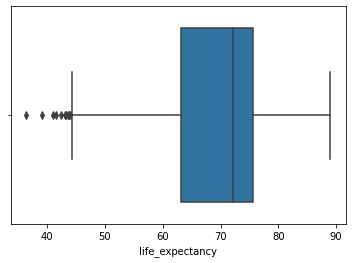

In [11]:
# view distribution shape of dependent variable
sns.boxplot(data["life_expectancy"])

# Data Processing

In [12]:
# check for NAs
for column in data.columns:
    print(f"{column}: {data[column].isnull().values.sum()}")

country: 0
year: 0
status: 0
life_expectancy: 10
adult_mortality: 10
infant_deaths: 0
alcohol: 194
expenditure_percent: 0
hepatitis_b: 553
measles: 0
bmi: 34
under_five: 0
polio: 19
expenditure_total: 226
diphtheria: 19
aids: 0
gdp: 448
population: 652
thinness_a: 34
thinness_b: 34
resources: 167
schooling: 163


In [13]:
# where are all the NAs coming from?
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data[data.isnull().any(axis=1)]["country"].value_counts())

Antigua and Barbuda                                     16
South Sudan                                             16
Grenada                                                 16
Bahrain                                                 16
Qatar                                                   16
Czechia                                                 16
Slovakia                                                16
Switzerland                                             16
Libya                                                   16
Kyrgyzstan                                              16
Barbados                                                16
Congo                                                   16
Republic of Moldova                                     16
Democratic Republic of the Congo                        16
Hungary                                                 16
Republic of Korea                                       16
Cuba                                                    

In [14]:
# filter data to only the most important variables
# make sure that there are no collinear variables as well, take only one out of every "pair"
old_data = data
data = data[["country", "life_expectancy", "adult_mortality", "alcohol", "bmi", "diphtheria", "aids", "gdp", "thinness_a", "schooling"]]

In [15]:
# first, we might want to not include the column with the majority of the NAs. then, just delete all the rows with outliers for now. 
# because this is split up by country and year, taking something like the median makes no sense.
# if needed, we can do some value imputation and try to predict missing values based on the country and other data points.
# this is something to think of for later.

data = data.drop(["gdp"], axis=1)

In [16]:
# where are all the NAs coming from now?
for column in data.columns:
    print(f"{column}: {data[column].isnull().values.sum()}")

country: 0
life_expectancy: 10
adult_mortality: 10
alcohol: 194
bmi: 34
diphtheria: 19
aids: 0
thinness_a: 34
schooling: 163


In [17]:
# it's probably helpful to see null value counts by row as well
data.isnull().sum(axis=1).value_counts()

0    2562
1     324
2      30
4      12
3       9
5       1
dtype: int64

In [18]:
# let's delete all rows with 2+ null values and see the column counts again
data_dropped = data.dropna(thresh=len(data.columns) - 2)

for column in data.columns:
    print(f"{column}: {data_dropped[column].isnull().values.sum()}")

country: 0
life_expectancy: 5
adult_mortality: 5
alcohol: 176
bmi: 15
diphtheria: 8
aids: 0
thinness_a: 15
schooling: 160


In [19]:
# for alcohol and schooling, are there countries that make up the bulk of the null values?
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data[data[["country", "alcohol"]].isnull().any(axis=1)]["country"].value_counts())

South Sudan                                  16
Montenegro                                    2
Republic of Korea                             1
Maldives                                      1
Lebanon                                       1
Liberia                                       1
Mozambique                                    1
Spain                                         1
Egypt                                         1
Sri Lanka                                     1
Austria                                       1
Lesotho                                       1
Nepal                                         1
Belarus                                       1
Chad                                          1
Serbia                                        1
Namibia                                       1
Eritrea                                       1
Micronesia (Federated States of)              1
Mauritius                                     1
Australia                               

In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data[data[["country", "schooling"]].isnull().any(axis=1)]["country"].value_counts())

Democratic Republic of the Congo                        16
Democratic People's Republic of Korea                   16
Côte d'Ivoire                                           16
Republic of Moldova                                     16
United States of America                                16
Czechia                                                 16
Somalia                                                 16
United Republic of Tanzania                             16
Republic of Korea                                       16
United Kingdom of Great Britain and Northern Ireland    16
Monaco                                                   1
Cook Islands                                             1
Niue                                                     1
Name: country, dtype: int64


In [21]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(old_data[old_data[["country", "resources"]].isnull().any(axis=1)]["country"].value_counts())

Democratic Republic of the Congo                        16
United Kingdom of Great Britain and Northern Ireland    16
Côte d'Ivoire                                           16
Republic of Moldova                                     16
Republic of Korea                                       16
United States of America                                16
United Republic of Tanzania                             16
Democratic People's Republic of Korea                   16
Czechia                                                 16
Somalia                                                 16
Nauru                                                    1
Niue                                                     1
Tuvalu                                                   1
Cook Islands                                             1
San Marino                                               1
Monaco                                                   1
Marshall Islands                                        

In [22]:
# There seem to be a lot of null values for schooling for certain countries but not really for alcohol.
# Schooling is a highly correlated value so I am loathe to remove it.
# We can drop schooling or drop the rows; let's just drop the rows for now.

counts = data[data[["country", "schooling"]].isnull().any(axis=1)]["country"].value_counts()
to_drop = list(counts[counts > 1].index)
data = data[~data['country'].isin(to_drop)]

In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data["country"].value_counts())

Solomon Islands                              16
Estonia                                      16
Malta                                        16
Viet Nam                                     16
Armenia                                      16
Mauritania                                   16
Rwanda                                       16
Suriname                                     16
Qatar                                        16
Bangladesh                                   16
Saudi Arabia                                 16
Portugal                                     16
Indonesia                                    16
Panama                                       16
Nepal                                        16
Seychelles                                   16
Netherlands                                  16
United Arab Emirates                         16
Angola                                       16
Honduras                                     16
Togo                                    

In [24]:
# deleting all of the rows with only one value is likely helpful here.
# most of them have NA values, and the ones that do not are likely unhelpful to our analysis.

counts = data["country"].value_counts()
to_drop = list(counts[counts == 1].index)
data = data[~data['country'].isin(to_drop)]

In [25]:
# From here, we can try to use group imputation value for the rest of the variables.
# We can take the median of the country's values for a variable and fill in the NA values that way.
# We'll be doing this for the rest of the null values as well, except for the dependent.

cols = list(data.columns)
cols.remove("country")
cols.remove("life_expectancy")

for col in cols:
    data[col] = data.groupby('country')[col].transform(lambda x: x.fillna(x.median()))

/home/daniel/miniconda3/envs/kaggle/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/daniel/miniconda3/envs/kaggle/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/daniel/miniconda3/envs/kaggle/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/daniel/miniconda3/envs/kaggle/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/daniel/miniconda3/envs/kaggle/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [26]:
# from here, we can remove the rows of the few NA values that are left and can continue our analysis

data = data.drop(["country"], axis=1)

for column in data.columns:
    print(f"{column}: {data[column].isnull().values.sum()}")
    
data = data.dropna()
print(data.shape)

life_expectancy: 0
adult_mortality: 0
alcohol: 16
bmi: 32
diphtheria: 0
aids: 0
thinness_a: 32
schooling: 0
(2736, 8)


In [27]:
# check skew of all the variables by using scipy's skew
# for skewed variables, transform the variables with an initial log transform and look again.
print(data.apply(skew))
indep = data.drop("life_expectancy", axis=1)
skewness = indep.apply(skew)
skewed_features = skewness[abs(skewness) >= 1].index
log_data = data
log_data[skewed_features] = np.log(log_data[skewed_features])
print(log_data.apply(skew))

life_expectancy   -0.693037
adult_mortality    1.264243
alcohol            0.604276
bmi               -0.267243
diphtheria        -2.145349
aids               5.319016
thinness_a         1.717316
schooling         -0.484544
dtype: float64
life_expectancy   -0.693037
adult_mortality   -1.280395
alcohol            0.604276
bmi               -0.267243
diphtheria        -3.314000
aids               1.335263
thinness_a        -0.559659
schooling         -0.484544
dtype: float64


NormaltestResult(statistic=181.69976005486222, pvalue=3.5026635464068913e-40)


<AxesSubplot:xlabel='life_expectancy', ylabel='Count'>

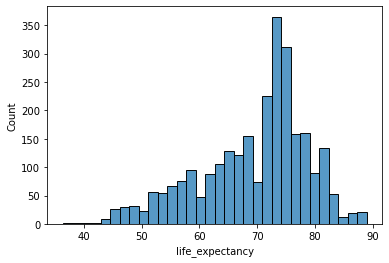

In [28]:
# check normality of the dependent variable
print(normaltest(data["life_expectancy"]))

# this isn't normal, so let's graph it in a barplot
sns.histplot(data["life_expectancy"])

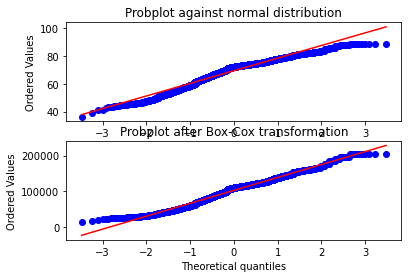

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = data["life_expectancy"]
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

# the probplot gets worse on the left side but better on the right side
# however, scipy's skew measure says that the skew has disappeared
# we can test with the un-transformed dependent variable for now

In [30]:
# we removed skew but not normality, which is a warning but ok for now
# later on after we do the actual regression we should take a look at the residuals
# if they are not normally distributed, then we should examine them more closely

print(skew(boxcox(data["life_expectancy"])[0]))
print(normaltest(boxcox(data["life_expectancy"])[0]))

-0.09501642898579908
NormaltestResult(statistic=38.94650944808286, pvalue=3.4903817455270103e-09)


# Model Building

In [31]:
# Simple regression stuff for now, with more advance techniques to come in later.

from sklearn.metrics import r2_score

In [32]:
X = data.drop("life_expectancy", axis=1)
y = data["life_expectancy"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scorer = make_scorer(mean_squared_error, greater_is_better = False)

# here we can standardize the data if necessary, using a Scaler for the task.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
def cross_val(model):
    train_rmse = np.sum(np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10)))
    test_rmse = np.sum(np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10)))
    return (train_rmse, test_rmse)

def plot_residuals(train_pred, test_pred):
    # plot resiudals
    plt.scatter(train_pred, train_pred - y_train, c = "blue", marker = "s", label = "Training data")
    plt.scatter(test_pred, test_pred - y_test, c = "red", marker = "s", label = "Test data")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.legend(loc = "upper left")
    plt.hlines(y=0, xmin=40, xmax=90, color = "green")
    plt.show()

def plot_predictions(train_pred, test_pred):
    # plot predictions
    plt.scatter(train_pred, y_train, c = "blue", marker = "s", label = "Training data")
    plt.scatter(test_pred, y_test, c = "red", marker = "s", label = "Test data")
    plt.xlabel("Predicted")
    plt.ylabel("Actual Values")
    plt.legend(loc = "upper left")
    plt.plot(color = "green")
    plt.show()

def fit_plot(model):
    train_rmse, test_rmse = cross_val(model)
    print(f"Train rmse: {train_rmse}\nTest rmse: {test_rmse}")
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    score = r2_score(y_test, test_pred)
    print(f"r2 score: {score}")
    plot_residuals(train_pred, test_pred)
    plot_predictions(train_pred, test_pred)
        
def plot_coefs(model):
    coefs = pd.Series(model.coef_, index = list(data.columns)[1:])
    coefs.sort_values().plot(kind = "barh")
    plt.title("Coefficients in the Lasso Model")
    plt.show()
    
def fit_alpha(model):
    tester = model(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
    tester.fit(X_train, y_train)
    alpha = tester.alpha_

    final = model(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                              alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                              alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], cv = 10)
    final.fit(X_train, y_train)
    alpha = final.alpha_
    plot_coefs(final)
    return final

Train rmse: 40.413870865288786
Test rmse: 42.361187828398926
r2 score: 0.8024469620608192


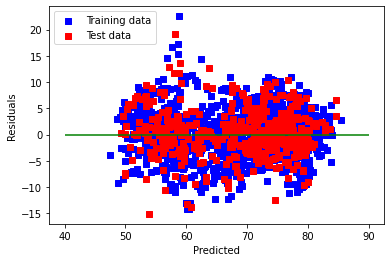

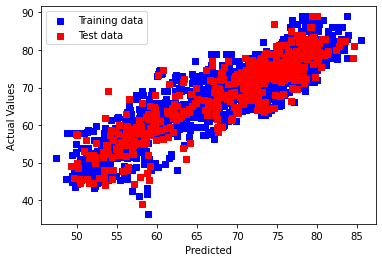

In [34]:
lr = LinearRegression()
fit_plot(lr)

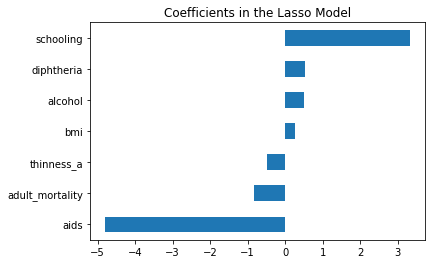

Train rmse: 40.41305556512641
Test rmse: 42.34322985036705
r2 score: 0.8024153339687332


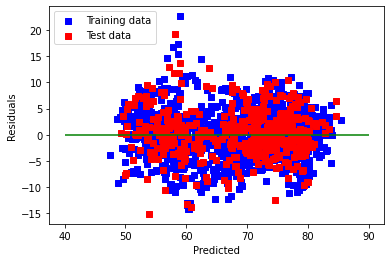

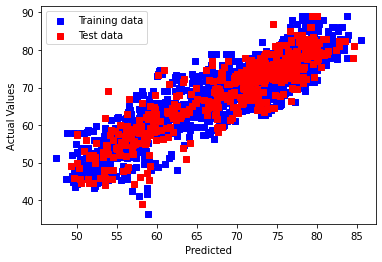

In [35]:
# regularization with linear regression
ridge = fit_alpha(RidgeCV)
fit_plot(ridge)

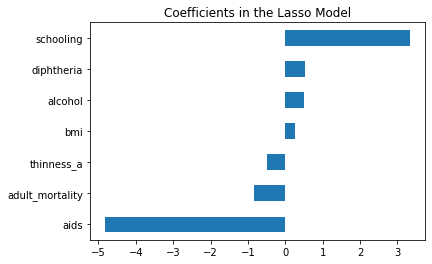

Train rmse: 40.4138773143824
Test rmse: 42.35975226675793
r2 score: 0.8024482095122628


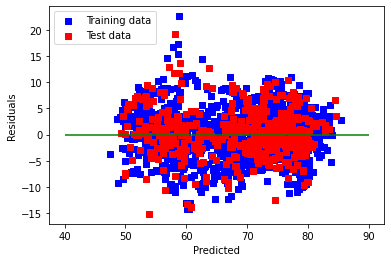

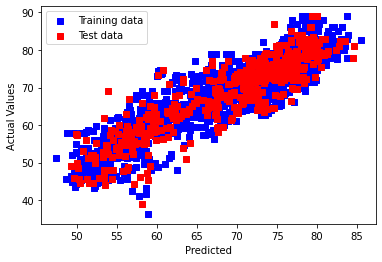

In [36]:
# lasso regularization with linear regression
lasso = fit_alpha(LassoCV)
fit_plot(lasso)

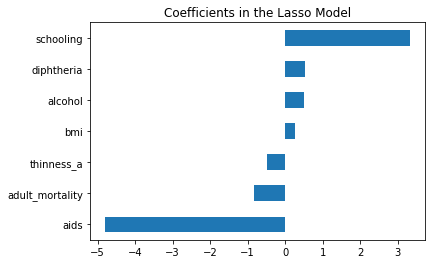

Train rmse: 40.415097033177986
Test rmse: 42.35035040505923
r2 score: 0.8024177233747133


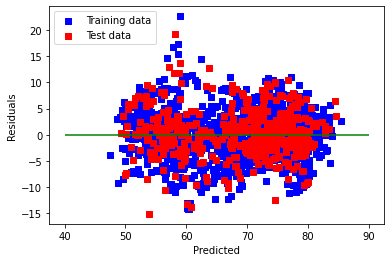

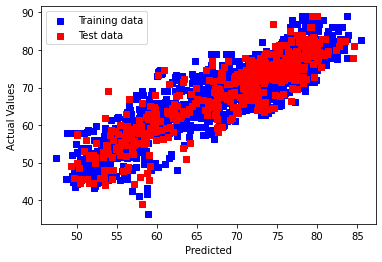

In [37]:
# regularization with elastic net
elastic = fit_alpha(ElasticNetCV)
fit_plot(elastic)

In [42]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

param_tuning = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators' : [100, 200, 500],
    'objective': ['reg:squarederror']
}

xgb_model = xgb.XGBRegressor()

search = RandomizedSearchCV(estimator = xgb_model,
                       param_distributions = param_tuning,
                       scoring = 'neg_mean_squared_error',
                       cv = 10)

search.fit(X_train, y_train)
model_xgb = search.best_estimator_

Train rmse: 18.29083698133109
Test rmse: 25.28190372314046
r2 score: 0.9640334633472633


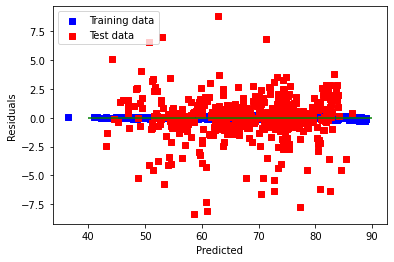

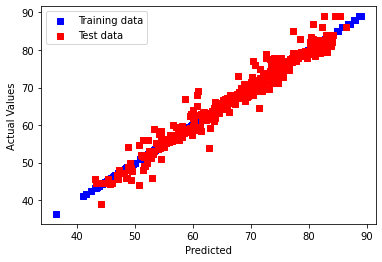

In [43]:
fit_plot(model_xgb)

<AxesSubplot:xlabel='xgb', ylabel='lasso'>

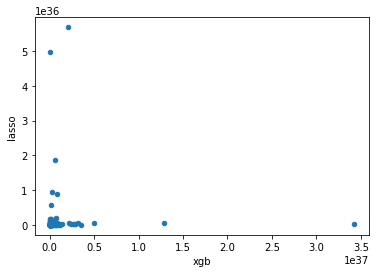

In [44]:
# xgb regressor, plus comparison between xgb and lasso
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(lasso.predict(X_test))
predictions = pd.DataFrame({"xgb": xgb_preds, "lasso": lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [48]:
# let's do a random forest regressor next, with optimized hyperparameters through tuning
from sklearn.ensemble import RandomForestRegressor

rf_params = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rf_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=rf_params, cv=10)
rf_search.fit(X_train, y_train)
rf = rf_search.best_estimator_

Train rmse: 19.416897047827245
Test rmse: 26.120339574365715
r2 score: 0.9644167818772266


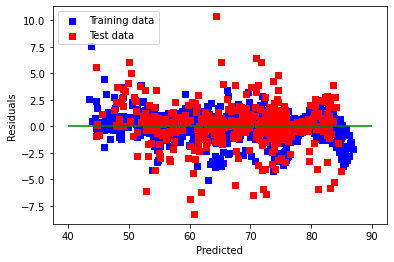

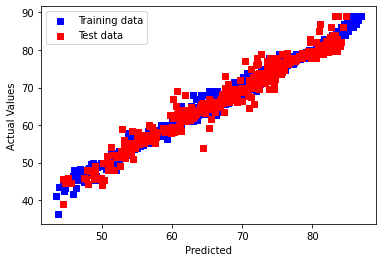

In [49]:
fit_plot(rf)

Train rmse: 22.465613488858526
Test rmse: 27.35652077626947
r2 score: 0.9353655020708853


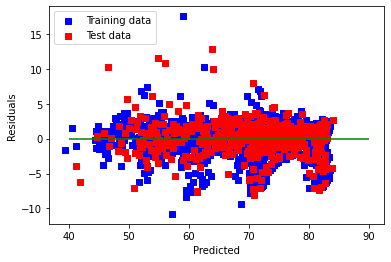

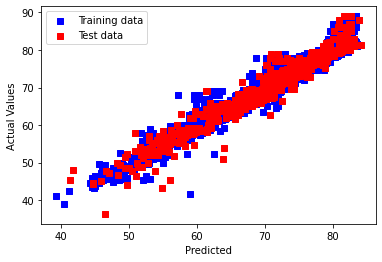

In [251]:
# to end the analysis, let's do a stacked regression
from sklearn.ensemble import StackingRegressor

model_dict = [
    ("lr", lr),
    ("xgb", model_xgb),
    ("lasso", lasso),
    ("ridge", ridge),
    ("elastic", elastic),
]
stacked_model = StackingRegressor(estimators=model_dict, final_estimator=LinearRegression(), cv=5)
fit_plot(stacked_model)